In [1]:
import os
import sys
import csv
from tqdm import tqdm
import h5py
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
sys.path.append('../preprocess')
from ukbheart import crop



2024-07-08 08:58:51.547448: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/raecker1/envs/nakoukb/lib/python3.9/site-packages/cv2/../../lib64:
2024-07-08 08:58:51.547487: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Inner Organ Fat / Fat Fraction

In [2]:
resume = '2439693'
img_path = '/mnt/qdata/rawdata/UKBIOBANK/ukbdata_50k/abdominal_MRI/raw/'
mask_path = '/mnt/qdata/share/rakuest1/data/UKB/raw/abdominal_MRI/processed/seg_ori'
bounding_boxes_path = '/mnt/qdata/share/rakuest1/data/UKB/raw/abdominal_MRI/processed/seg_ori/bounding_boxes_abdomen.csv'
organs = ['liv', 'spl', 'rkd', 'lkd', 'pnc']
sel_shapes = {'liv': [120, 100, 70], 'spl': [60, 60, 50], 'rkd': [40, 40, 50], 'lkd': [40, 40, 50], 'pnc': [80, 50, 50]}
#df_AT = pd.DataFrame(columns=['eid'] + organs)
mode = 'w' if resume is None else 'a'
with open('/mnt/qdata/share/raecker1/AT_examples/organ_fat_fraction.csv', mode) as out:
    csv_out = csv.writer(out)
    if resume is None:
        csv_out.writerow(['eid'] + organs)
        files = os.listdir(img_path)
    else:
        files = os.listdir(img_path)
        files = files[files.index(resume)+1:]
    for i, subject in enumerate(tqdm(files)):
        try:
            # load fat image
            nimf = nib.load(os.path.join(img_path, subject, 'fat.nii.gz'))
            fat_image = nimf.get_fdata()
            #load wat image
            nimw = nib.load(os.path.join(img_path, subject, 'wat.nii.gz'))
            wat_image = nimw.get_fdata()            
            # load seg mask
            nmsk = nib.load(os.path.join(mask_path, subject, 'prd.nii.gz'))
            mask = nmsk.get_fdata()
        except:
            print(f'skip {subject}')
            continue

        bounding_boxes = pd.read_csv(bounding_boxes_path)

        row = [subject]
        for j, class_name in enumerate(organs):
            sel_shape_curr = sel_shapes[class_name]
            box = bounding_boxes.loc[bounding_boxes['pat'] == int(subject)][class_name].values
            box = np.asarray([list(ast.literal_eval(l)) for l in box])[0]
            if list(box) == [-1, -1, -1, -1, -1, -1]:
                row.append(str(np.nan))
            else:
                center = list(np.floor((box[0:3] + box[3:6]) / 2))  # + [np.floor(np.shape(img_data)[2] / 2)]
                center = [int(x) for x in center]
                fat_img_crop = crop(fat_image, sel_shape_curr, center)
                wat_img_crop = crop(wat_image, sel_shape_curr, center)
                mask_crop = crop(mask, sel_shape_curr, center)
                mask_crop = np.where(mask_crop == j+1, 1, 0)
                img_fat = np.multiply(fat_img_crop, mask_crop)
                img_wat = np.multiply(wat_img_crop, mask_crop)
                fat = img_fat.sum()
                wat = img_wat.sum()
                fat_fraction = fat / (fat + wat)
                #fat_count = np.where(img_fat > 0.5, 1, 0).sum()
                row.append(str(fat_fraction))
                #plt.imshow(img_fat[:,:,img_fat.shape[2]//2], cmap='gray')
                #plt.savefig(f'/mnt/qdata/share/raecker1/AT_examples/{subject}_AT_organ_{class_name}.png')
        csv_out.writerow(row)
        #df_AT.loc[i] = row
#df_AT.to_csv('/mnt/qdata/share/raecker1/AT_examples/organ_fat.csv')


  0%|          | 52/32011 [01:18<15:37:32,  1.76s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  0%|          | 73/32011 [01:51<13:11:30,  1.49s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  0%|          | 104/32011 [02:39<13:11:51,  1.49s/it]

skip 2449050


  0%|          | 113/32011 [03:40<54:01:25,  6.10s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  0%|          | 125/32011 [04:21<25:27:39,  2.87s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  0%|          | 128/32011 [04:40<45:40:59,  5.16s/it]

skip 2451591


  0%|          | 144/32011 [06:07<43:14:08,  4.88s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  0%|          | 154/32011 [06:33<25:01:45,  2.83s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  1%|          | 172/32011 [08:20<41:07:39,  4.65s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  1%|          | 175/32011 [08:30<34:33:24,  3.91s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  1%|          | 189/32011 [09:31<65:14:51,  7.38s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  1%|          | 198/32011 [10:45<62:58:54,  7.13s

skip 2479783


  1%|          | 368/32011 [23:20<42:14:33,  4.81s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  1%|          | 390/32011 [25:05<72:39:51,  8.27s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  1%|▏         | 435/32011 [28:42<66:58:56,  7.64s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  2%|▏         | 524/32011 [36:21<66:19:02,  7.58s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  2%|▏         | 573/32011 [39:06<19:13:43,  2.20s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  2%|▏         | 574/32011 [39:09<20:39:09,  2.37s

skip 2530871


  3%|▎         | 804/32011 [54:33<15:33:40,  1.80s/it]

skip 2531156


  3%|▎         | 819/32011 [55:25<21:22:42,  2.47s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  3%|▎         | 834/32011 [56:00<18:32:42,  2.14s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  3%|▎         | 837/32011 [56:06<18:15:47,  2.11s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  3%|▎         | 852/32011 [57:33<67:40:30,  7.82s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  3%|▎         | 865/32011 [59:00<49:26:24,  5.71s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  3%|▎         | 894/32011 [1:00:55<83:14:11,  9.6

skip 2587282


  4%|▍         | 1285/32011 [1:34:02<59:33:24,  6.98s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  4%|▍         | 1293/32011 [1:34:53<42:14:16,  4.95s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  4%|▍         | 1295/32011 [1:34:58<31:06:43,  3.65s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  4%|▍         | 1309/32011 [1:35:33<20:36:53,  2.42s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  4%|▍         | 1312/32011 [1:35:41<21:09:18,  2.48s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  4%|▍         | 1338/32011 [1:37:4

skip 2657853


  6%|▌         | 1951/32011 [2:47:42<29:10:29,  3.49s/it] /tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  6%|▌         | 1959/32011 [2:48:42<108:50:39, 13.04s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  6%|▌         | 1977/32011 [2:51:08<71:46:10,  8.60s/it] /tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  6%|▋         | 2016/32011 [2:55:49<38:37:14,  4.64s/it] /tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  6%|▋         | 2033/32011 [2:57:13<31:03:09,  3.73s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  6%|▋         | 2035/32011 [2:

skip 2893424


  8%|▊         | 2550/32011 [3:44:14<46:52:39,  5.73s/it]

skip 2896852


  8%|▊         | 2567/32011 [3:45:57<35:00:26,  4.28s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  8%|▊         | 2600/32011 [3:49:04<118:53:28, 14.55s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  8%|▊         | 2609/32011 [3:49:45<35:17:37,  4.32s/it] /tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  8%|▊         | 2613/32011 [3:49:53<21:08:58,  2.59s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  8%|▊         | 2626/32011 [3:51:24<43:21:38,  5.31s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
  8%|▊         | 2645/32011 [3:53

skip 2739362


 10%|▉         | 3084/32011 [4:38:59<80:44:25, 10.05s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|▉         | 3126/32011 [4:42:59<37:42:48,  4.70s/it] /tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|▉         | 3148/32011 [4:45:41<77:49:04,  9.71s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|▉         | 3153/32011 [4:46:43<91:55:31, 11.47s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|▉         | 3163/32011 [4:47:32<34:16:36,  4.28s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|▉         | 3172/32011 [4:47:

skip 2747193


 10%|▉         | 3194/32011 [4:50:02<24:38:40,  3.08s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|▉         | 3196/32011 [4:50:14<37:18:44,  4.66s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|█         | 3244/32011 [4:55:45<81:06:59, 10.15s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|█         | 3245/32011 [4:55:54<77:51:45,  9.74s/it]

skip 2866156


/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|█         | 3315/32011 [5:02:07<93:37:46, 11.75s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|█         | 3326/32011 [5:02:59<33:51:30,  4.25s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|█         | 3332/32011 [5:03:39<57:05:59,  7.17s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|█         | 3333/32011 [5:03:54<75:39:45,  9.50s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 10%|█         | 3348/32011 [5:06:06<93:23:25, 11.73s/it]/tmp/ipykernel_2210889/3442096845.p

skip 2760892


 12%|█▏        | 3695/32011 [5:41:40<68:59:52,  8.77s/it]

skip 2762129


 12%|█▏        | 3729/32011 [5:46:07<53:13:08,  6.77s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 12%|█▏        | 3745/32011 [5:47:33<28:46:50,  3.67s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 12%|█▏        | 3760/32011 [5:49:10<90:49:40, 11.57s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 12%|█▏        | 3783/32011 [5:51:00<63:37:54,  8.12s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 12%|█▏        | 3802/32011 [5:53:22<28:23:34,  3.62s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 12%|█▏        | 3838/32011 [5:56:3

skip 2931293


 14%|█▍        | 4439/32011 [7:01:40<66:16:23,  8.65s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4441/32011 [7:02:16<100:40:59, 13.15s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4451/32011 [7:02:39<20:14:10,  2.64s/it] /tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4461/32011 [7:03:36<57:03:38,  7.46s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4489/32011 [7:06:33<18:39:14,  2.44s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4495/32011 [7:06

skip 2942320


 14%|█▍        | 4531/32011 [7:10:36<66:47:17,  8.75s/it] /tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4542/32011 [7:12:00<52:53:52,  6.93s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4554/32011 [7:12:28<17:51:35,  2.34s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4567/32011 [7:13:48<52:58:21,  6.95s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4581/32011 [7:14:36<43:19:45,  5.69s/it]/tmp/ipykernel_2210889/3442096845.py:52: RuntimeWarning: invalid value encountered in double_scalars
  fat_fraction = fat / (fat + wat)
 14%|█▍        | 4585/32011 [7:15:

Outer Organ Fat

In [3]:
resume = '1845510'
organ_mask_path = '/mnt/qdata/share/rakuest1/data/UKB/raw/abdominal_MRI/processed/seg_ori'
AT_mask_path = '/mnt/qdata/rawdata/UKBIOBANK/ukbdata_50k/abdominal_MRI/processed/seg_AT'
bounding_boxes_path = '/mnt/qdata/share/rakuest1/data/UKB/raw/abdominal_MRI/processed/seg_ori/bounding_boxes_abdomen.csv'
organs = ['liv', 'spl', 'rkd', 'lkd', 'pnc']
sel_shapes = {'liv': [120, 100, 70], 'spl': [60, 60, 50], 'rkd': [40, 40, 50], 'lkd': [40, 40, 50], 'pnc': [80, 50, 50]}

mode = 'w' if resume is None else 'a'
with open('/mnt/qdata/share/raecker1/AT_examples/outter_fat.csv', mode) as out:
    csv_out = csv.writer(out)
    if resume is None:
        csv_out.writerow(['eid'] + organs)
        files = os.listdir(organ_mask_path)
    else:
        files = os.listdir(organ_mask_path)
        files = files[files.index(resume)+1:]
    for i, subject in enumerate(tqdm(files)):
        try:
            # load seg mask
            nom = nib.load(os.path.join(organ_mask_path, subject, 'prd.nii.gz'))
            organ_mask = nom.get_fdata()
            # load AT mask
            nfm = nib.load(os.path.join(AT_mask_path, f'ukbb_{i+1:05}.nii.gz'))
            fat_mask = nfm.get_fdata()
        except:
            print(f'skip {subject}')
            continue

        bounding_boxes = pd.read_csv(bounding_boxes_path)

        row = [subject]
        for j, class_name in enumerate(organs):
            sel_shape_curr = sel_shapes[class_name]
            box = bounding_boxes.loc[bounding_boxes['pat'] == int(subject)][class_name].values
            box = np.asarray([list(ast.literal_eval(l)) for l in box])[0]
            center = list(np.floor((box[0:3] + box[3:6]) / 2))  # + [np.floor(np.shape(img_data)[2] / 2)]
            center = [int(x) for x in center]
            organ_mask_crop = crop(organ_mask, sel_shape_curr, center)
            fat_mask_crop = crop(fat_mask, sel_shape_curr, center)
            organ_mask_crop = np.where(organ_mask_crop == j+1, 0, 1)
            outter_fat = np.multiply(organ_mask_crop, fat_mask_crop)
            outter_fat_count = np.sum(outter_fat, dtype=int)
            row.append(str(outter_fat_count))
            #plt.imshow(outter_fat[:,:,outter_fat.shape[2]//2], cmap='gray')
            #plt.show()
            #plt.savefig(f'/mnt/qdata/share/raecker1/AT_examples/{subject}_AT_outside_{class_name}.png')
        csv_out.writerow(row)


 10%|▉         | 3673/37806 [37:12<4:58:37,  1.91it/s] 

skip 2184236


 10%|▉         | 3695/37806 [37:23<5:25:01,  1.75it/s]

AT segmentation mask over whole body images

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done


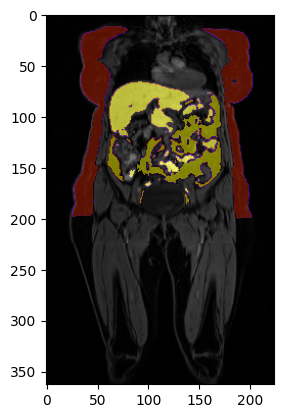

In [ ]:
img_path = '/mnt/qdata/rawdata/UKBIOBANK/ukbdata_50k/abdominal_MRI/raw/'
mask_path = '/mnt/qdata/rawdata/UKBIOBANK/ukbdata_50k/abdominal_MRI/processed/seg_AT/'

for i, subject in enumerate(os.listdir(img_path)[:100]):
    # load image
    nim = nib.load(os.path.join(img_path, subject, 'wat.nii.gz'))
    image = nim.get_fdata()
    # load AT mask
    nmsk = nib.load(os.path.join(mask_path, f'ukbb_{i+1:05}.nii.gz'))
    mask = nmsk.get_fdata()

    image = np.rot90(image[:,image.shape[1]//2,:])
    mask = np.rot90(mask[:,mask.shape[1]//2,:])

    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='gnuplot', alpha=0.5)
    plt.savefig(f'/mnt/qdata/share/raecker1/AT_examples/{subject}_segAT.png')
    print(f'{i} done')

In [ ]:
keys = '/mnt/qdata/share/rakuest1/data/UKB/interim/keys/imaging_abdomen.dat'
data = '/mnt/qdata/share/rakuest1/data/UKB/interim/ukb_liv_preprocessed.h5'
group_str = ''
contrast = 'fat'

keys = [l.strip() for l in Path(keys).open().readlines()] if isinstance(keys, str) else keys
fhandle = h5py.File(data, 'r')
for key in tqdm(keys):
    if '/' in key:  # combined kidney set
        keyh5 = key
        key = key.split('/')[0]
        orientation = keyh5.split('/')[1]
    else:
        keyh5 = key
        orientation = None
    data = []
    group_str_inner = group_str + contrast + '/'
    data = fhandle[f'{group_str_inner}{keyh5}'][:]